# Prediction Model

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Step One: Graphing and Visualization

In [ ]:
# making pandas dataframe
original_df = pd.read_csv('data.csv')

original_df

In [ ]:
# creates and visualizes a plot of the x and y coordinates of the values
plt.scatter(original_df['X'], original_df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')

plt.show()

In [ ]:
# overlays visualization of the values of the SCFshift according to magnitude
plt.scatter(original_df['X'], original_df['Y'], c=original_df['SCFshift'], cmap='viridis')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Gradient')

plt.colorbar(label='SCFshift')

plt.show()


# Step Two: Polynomial Regresssion Model

In [22]:
# determines the correlation between the SCFshift and the other values
list = original_df.corr(numeric_only=True).abs()[["SCFshift"]]
list

,SCFshift
X,0.000546
Y,0.000546
SCF,1.000000
SCFshift,1.000000
G1 - r= 7,0.546373
...,...
G5-1 R_cut = 12,0.608145
G5-2 R_cut = 12,0.652120
G5-3 R_cut = 12,0.727358
G5-4 R_cut = 12,0.841867


In [23]:
# creates a new dataframe with the selected columns
selected_columns = ['G3-2 R_cut = 8', 'G3-2 R_cut = 9', 'G3-2 R_cut = 7', 'G3-2 R_cut = 10', 'G3-1 R_cut = 7']
normalized_df = original_df[selected_columns]

# normalizes the values in the new dataframe
for column in selected_columns:
    min_val = np.min(normalized_df[column])
    max_val = np.max(normalized_df[column])
    normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)

normalized_df

,G3-2 R_cut = 8,G3-2 R_cut = 9,G3-2 R_cut = 7,G3-2 R_cut = 10,G3-1 R_cut = 7
0,1.252691e-16,0.000000e+00,0.000000e+00,1.224182e-16,1.000000
1,6.419210e-01,6.397179e-01,5.949944e-01,6.074495e-01,0.365642
2,9.727670e-01,8.788642e-01,1.000000e+00,7.428985e-01,0.236012
3,8.876836e-01,8.421444e-01,8.742817e-01,7.590916e-01,0.214211
4,3.077067e-01,3.245302e-01,2.608861e-01,3.237935e-01,0.644513
...,...,...,...,...,...
95,3.077067e-01,3.245302e-01,2.608861e-01,3.237935e-01,0.644513
96,8.876836e-01,8.421444e-01,8.742817e-01,7.590916e-01,0.214211
97,9.727670e-01,8.788642e-01,1.000000e+00,7.428985e-01,0.236012
98,6.419210e-01,6.397179e-01,5.949944e-01,6.074495e-01,0.365642


In [24]:
# creates a new dataframe with the selected columns
X = normalized_df
y = original_df['SCFshift']

# Set the degree of the polynomial and the algorithm
_degree = 5
algorithm = 'linear_regression'

# Split the dataset into training and testing sets
test_size = 0.2
random_state = 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Create polynomial features
poly_features = PolynomialFeatures(degree=_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train the polynomial regression model
poly_regression_model = LinearRegression()
poly_regression_model.fit(X_train_poly, y_train)

# Generate predictions for the test dataset
y_pred = poly_regression_model.predict(X_test_poly)

# Calculate reliability score (R-squared)
reliability_score = r2_score(y_test, y_pred)

print("Reliability score for degree {} and {} algorithm: {}".format(_degree, algorithm, reliability_score))

Reliability score for degree 5 and linear_regression algorithm: 0.9950190996990289


### Index Reliability
five =  0.9950190996990289  
four =  0.9958673812710519  
three = 0.9948750241177019  
two =   0.9948693674407877  

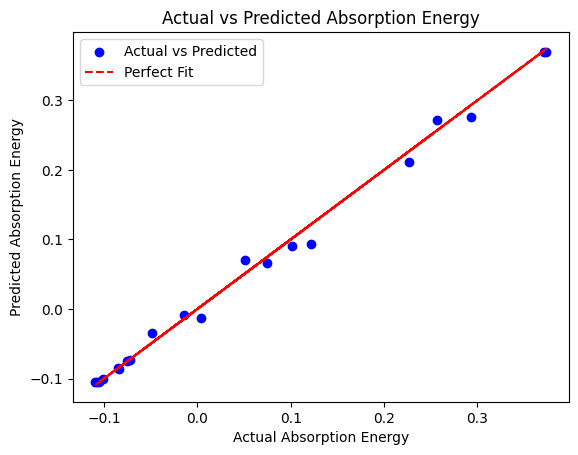

In [25]:
# Plot the actual vs predicted absorption energy values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Absorption Energy')
plt.ylabel('Predicted Absorption Energy')
plt.title('Actual vs Predicted Absorption Energy')
plt.legend()
plt.show()

# Step Three: Clustering

To answer these questions using clustering, you can perform the following steps:

* Select a subset of points from your list randomly or use an initial set of diverse points.  
* Apply a clustering algorithm (e.g., k-means, DBSCAN) to cluster these points based on their features.  
* Analyze the clusters and select representative points from each cluster.  
* Perform DFT calculations for the selected representative points and compute the corresponding adsorption energies.  
* Fit a linear regression model using the computed energies and the features of the representative points.  
* valuate the model's performance metrics (e.g., RMSE, R-squared) to assess its accuracy. 

In [33]:
import warnings
warnings.filterwarnings("ignore")

# Create a list of the points
points = normalized_df.values 

# Set the maximum number of clusters
max_clusters = 20
best_score = -1
best_clusters = 0

# Find the best number of clusters
coordinates = original_df.values
for num_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters)
    labels = kmeans.fit_predict(points)
    score = silhouette_score(points, labels)
    
    if score > best_score:
        best_score = score
        best_clusters = num_clusters

# Calculating the clusters
kmeans = KMeans(n_clusters=best_clusters)
labels = kmeans.fit_predict(points)

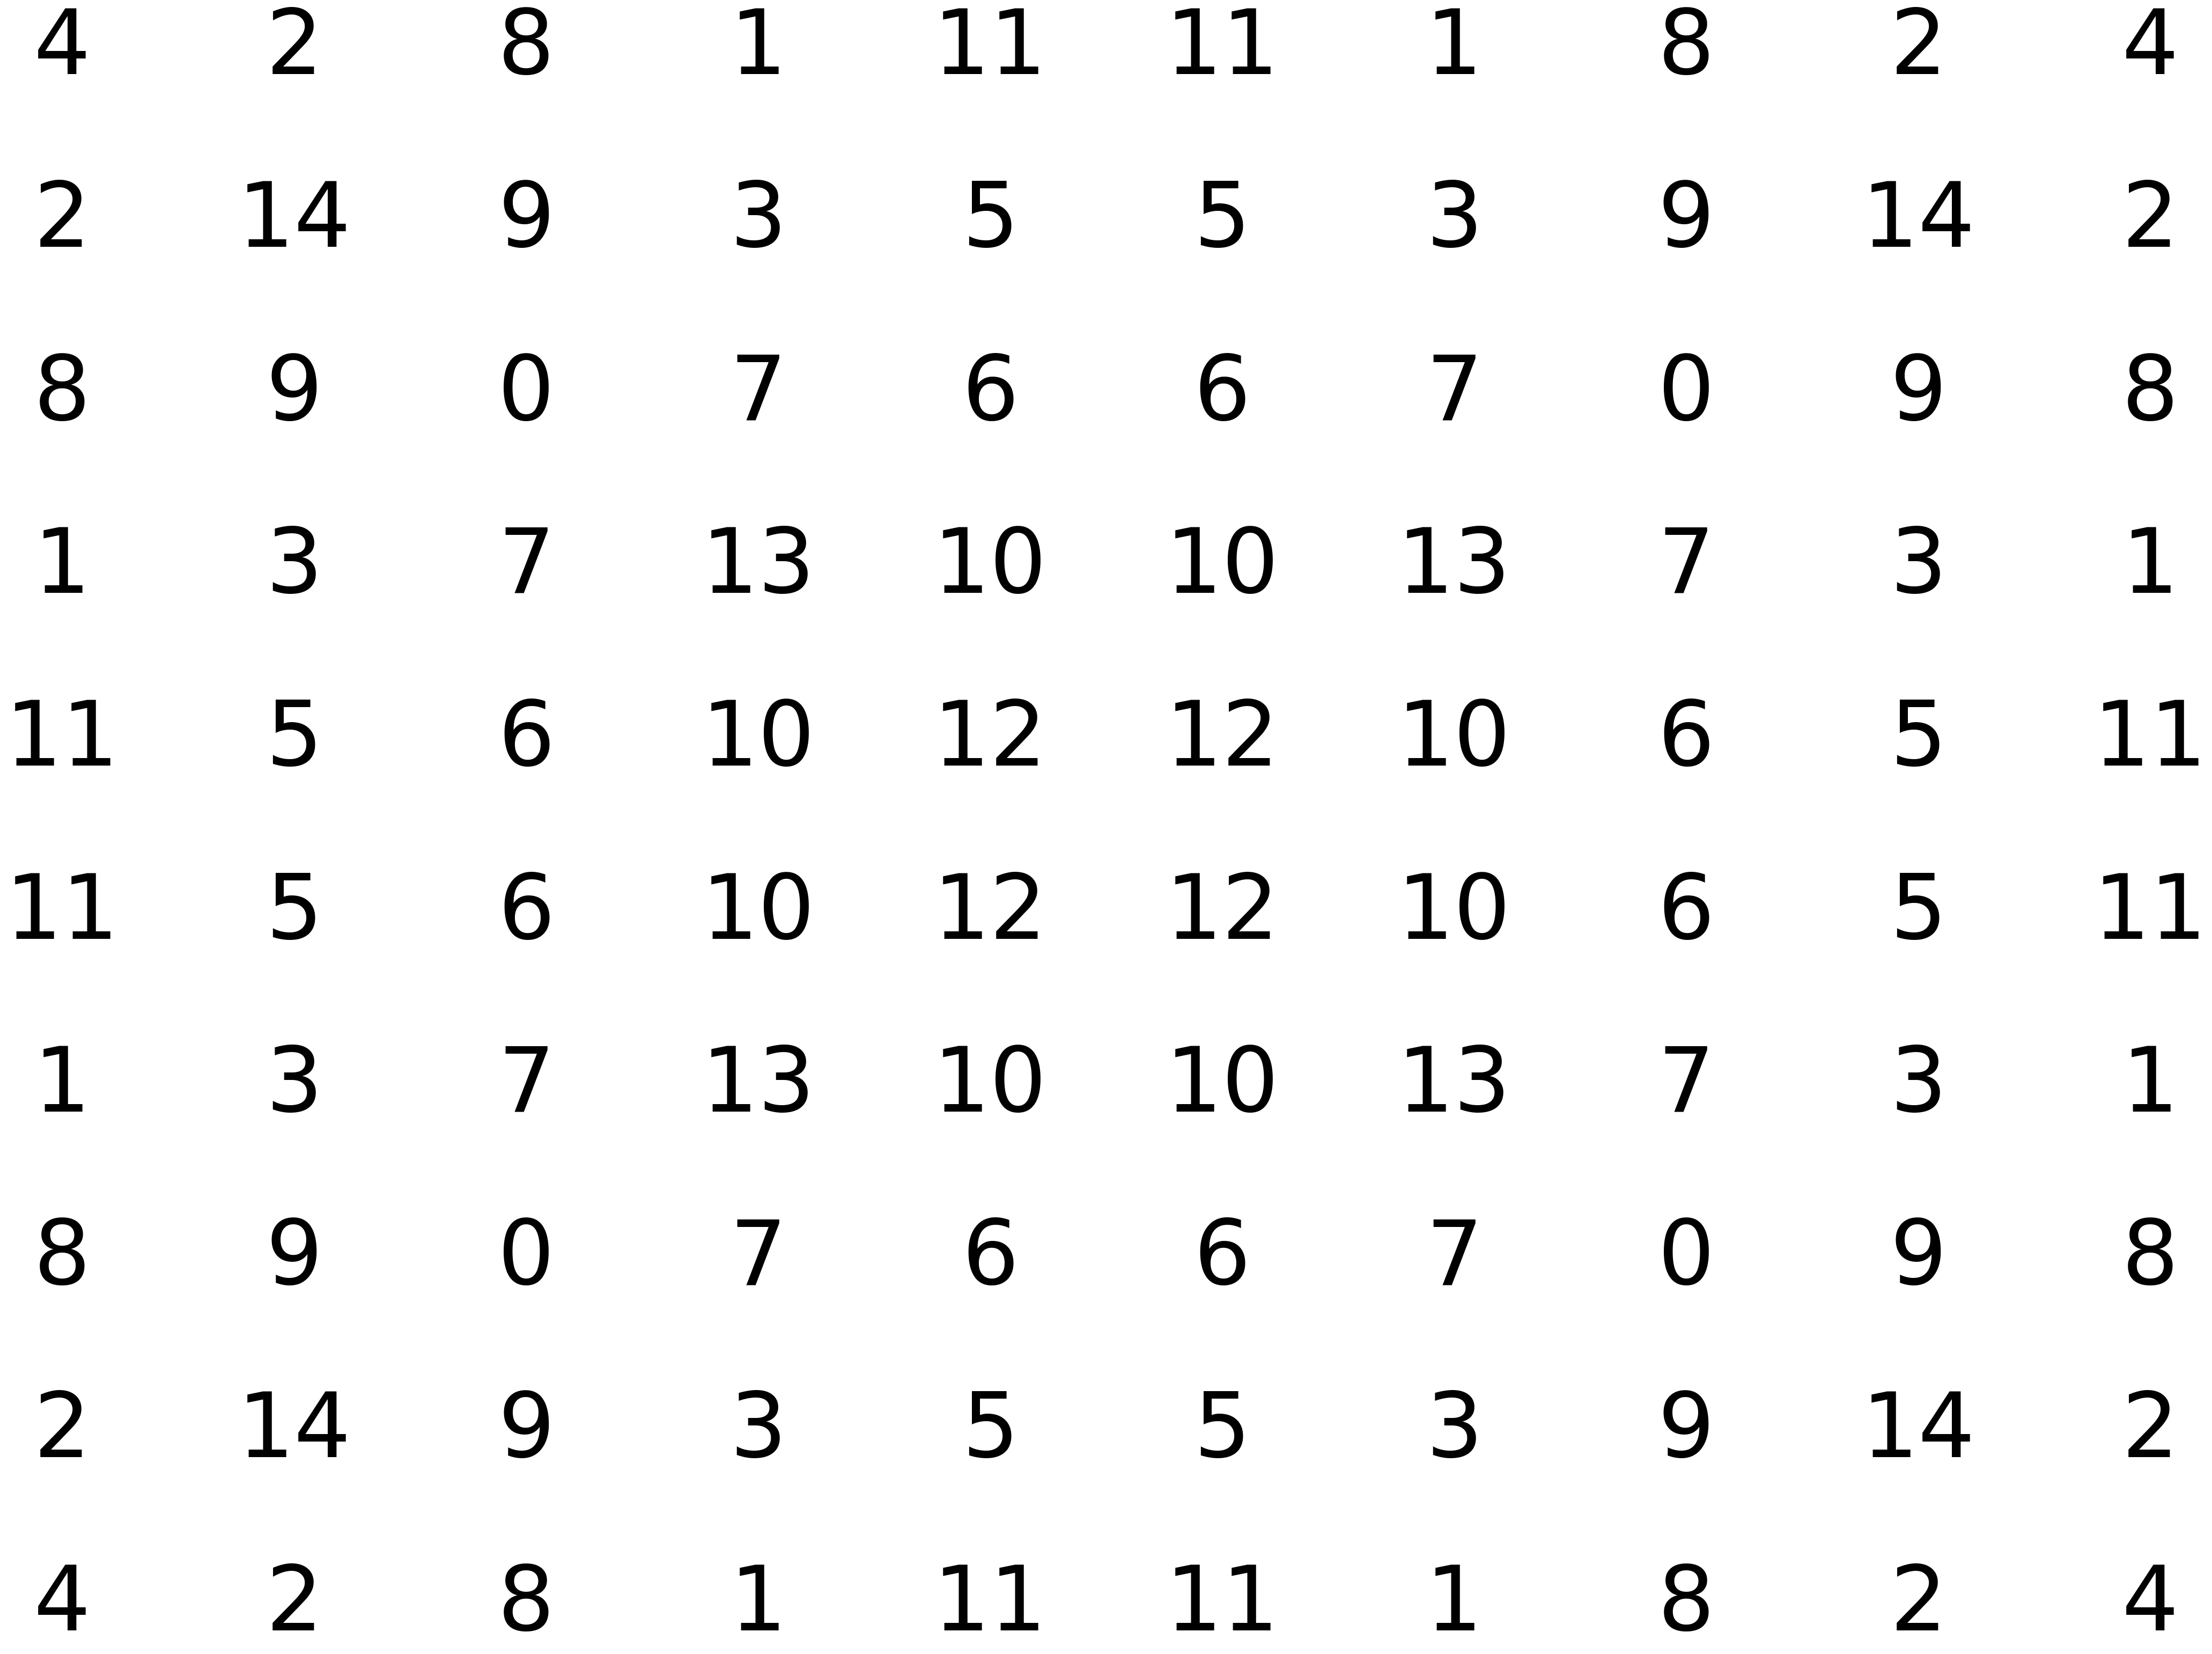

In [27]:
# Plot the clusters
for i, point in enumerate(coordinates):
    plt.text(point[0], point[1], labels[i], ha='center', va='center', fontsize=120)

plt.axis('off')
plt.show()

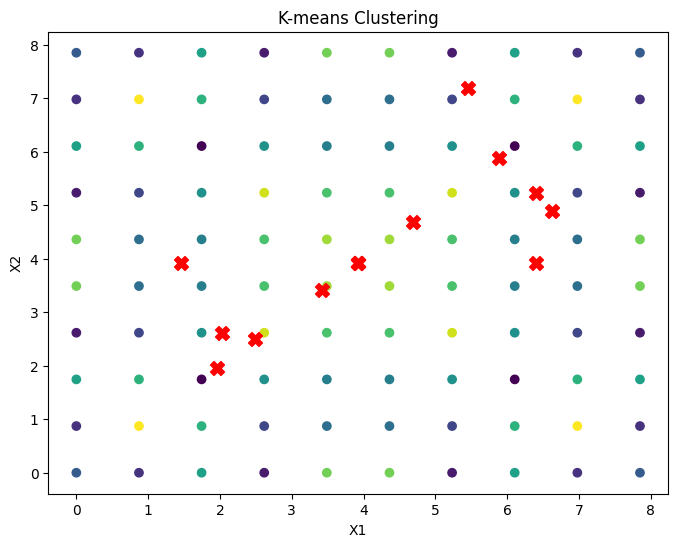

In [28]:
# Plot the data points and cluster centroids
kmeans1 = KMeans(n_clusters=best_clusters)
kmeans1.fit(original_df)
centroids = kmeans1.cluster_centers_
centroid_coords = np.array(centroids)

# Plot the data points and cluster centroids
plt.figure(figsize=(8, 6))
plt.scatter(original_df.iloc[:, 0], original_df.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering')
plt.show()

# Step 3.5 Estimate DFT Calculations

In [29]:
# Get the centroids
centroids = kmeans.cluster_centers_
closest_indices = []

# Iterate over each centroid and find the index of the closest point
for centroid in centroids:
    centroid_distances = [np.linalg.norm(point - centroid) for point in points]
    closest_index = np.argmin(centroid_distances)
    closest_indices.append(closest_index)

closest_indices

[27, 3, 10, 68, 90, 14, 52, 76, 20, 28, 53, 95, 54, 36, 81]

In [30]:
# Get the corresponding variables of the closest points
closest_points = normalized_df.iloc[closest_indices]

# Create a Pandas DataFrame with the closest points
closest_points_df = pd.DataFrame(closest_points, columns=normalized_df.columns)

closest_points_df

,G3-2 R_cut = 8,G3-2 R_cut = 9,G3-2 R_cut = 7,G3-2 R_cut = 10,G3-1 R_cut = 7
27,2.799949e-01,3.072881e-01,2.225160e-01,3.168532e-01,0.637411
3,8.876836e-01,8.421444e-01,8.742817e-01,7.590916e-01,0.214211
10,6.419210e-01,6.397179e-01,5.949944e-01,6.074495e-01,0.365642
68,9.658854e-01,9.979853e-01,8.635915e-01,9.861946e-01,0.006961
90,3.847550e-16,5.792247e-16,2.643647e-16,4.372079e-16,1.000000
14,8.309037e-01,8.632261e-01,7.342429e-01,8.557528e-01,0.121548
52,1.000000e+00,9.521428e-01,9.847122e-01,8.629671e-01,0.103959
76,5.931690e-01,6.221937e-01,5.126647e-01,6.202265e-01,0.341103
20,9.727670e-01,8.788642e-01,1.000000e+00,7.428985e-01,0.236012
28,8.626190e-01,8.618580e-01,8.028911e-01,8.226847e-01,0.148486


In [31]:
# Get the corresponding values of the closest SCF
closest_scf = original_df.iloc[:, 3].iloc[closest_indices]

# Create a Pandas DataFrame with the closest SCF
closest_scf_df = closest_scf.to_frame()

closest_scf_df

,SCFshift
27,0.274631
3,-0.084307
10,-0.013914
68,-0.106284
90,0.371507
14,-0.050209
52,-0.086874
76,0.074480
20,-0.073774
28,-0.077842


# Step Four: Linear Regression with Important Datapoints

In [32]:
# Set the degree of the polynomial and the algorithm
_degree = 4
algorithm = 'linear_regression'

# training our model on our cluster centroids and their corresponding SCFshift values
X_train = closest_points_df
y_train = closest_scf_df
X_test = normalized_df[~normalized_df.isin(X_train)].dropna()
y_test = original_df['SCFshift'].to_frame()[~original_df['SCFshift'].to_frame().isin(y_train)].dropna()

# Create polynomial features
poly_features = PolynomialFeatures(degree=_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train the polynomial regression model
poly_regression_model = LinearRegression()
poly_regression_model.fit(X_train_poly, y_train)

# Generate predictions for the test dataset
y_pred = poly_regression_model.predict(X_test_poly)

# Calculate reliability score (R-squared)
reliability_score = r2_score(y_test, y_pred)

print("Reliability score for degree {} and {} algorithm: {}".format(_degree, algorithm, reliability_score))

Reliability score for degree 4 and linear_regression algorithm: 0.9937954327275065


# Results:
### Reduced the DFT calculations from 100 to 15, with a reliability score of 99.37954327275055%